<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250513%5D%20Trust%20FL%20MLP-LSTM_logged_extended%20on%20WSN-DS(With%20AUC%26ROC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trust FL MLP-LSTM_logged_extended on WSN-DS**

In [ ]:
# trust_federated_mlp_lstm_logged_extended.py

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, InputLayer
from keras.regularizers import l2
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import cosine

In [ ]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")  # WSN-DS 5-class dataset
dataset = dataset.dropna()  # Remove missing values

In [ ]:
dataset

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Class
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,0
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,0
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,0
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,0
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,0
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,0
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,0
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,0


In [ ]:
# Encode non-numeric columns (if any)
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Identify categorical columns
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

# Separate features (X) and target (y)
X = dataset.drop(['Class'], axis=1)  # Assuming 'Class' is the target column
y = dataset['Class']

print("Original Class Distribution:", np.bincount(y))

Original Class Distribution: [340066  14596  10049   6638   3312]


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler here
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Verify the balanced dataset distribution
print("Balanced Class Distribution:", np.bincount(y))

Balanced Class Distribution: [340066 340066 340066 340066 340066]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

from sklearn.metrics import roc_curve, auc
from itertools import cycle

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step
Round 1
Accuracy: 0.48104486, Precision: 0.65000879, Recall: 0.48104486, F1-Score: 0.42125305
Confusion Matrix:
[[67522   441     4    46     0]
 [32093 35276   164   480     0]
 [15556 36784 10850  4823     0]
 [11204    78  8875 47857     0]
 [59135  6506     0   290  2082]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step
Round 2
Accuracy: 0.90546541, Precision: 0.92782512, Recall: 0.90546541, F1-Score: 0.90226217
Confusion Matrix:
[[67532   332     0    56    93]
 [   32 41062 26919     0     0]
 [    0     0 68008     5     0]
 [ 4430   152    75 63357     0]
 [   47     7     0     0 67959]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 3
Accuracy: 0.90583004, Precision: 0.92874922, Recall: 0.90583004, F1-Score: 0.90257922
Confusion Matrix:
[[67772   130     1    31    79]
 [   48 41022 26942     1     0]
 [    0     0 67982    31     0]
 [ 4565    97    52 63300     0]
 [   44     3     0     0 67966]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 4
Accuracy: 0.90620056, Precision: 0.92889412, Recall: 0.90620056, F1-Score: 0.90295175
Confusion Matrix:
[[67693   170     1    51    98]
 [   37 41032 26940     4     0]
 [    0     0 67971    42     0]
 [ 4397   109    30 63478     0]
 [   18     1     0     0 67994]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 5
Accuracy: 0.90573300, Precision: 0.92835300, Recall: 0.90573300, F1-Score: 0.90250210
Confusion Matrix:
[[67676   224    10    27    76]
 [   33 41041 26939     0     0]
 [    0     0 68009     4     0]
 [ 4517   154    44 63299     0]
 [   29     0     0     0 67984]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
Round 6
Accuracy: 0.90581240, Precision: 0.92876383, Recall: 0.90581240, F1-Score: 0.90257448
Confusion Matrix:
[[67781   139     5    11    77]
 [   29 41045 26939     0     0]
 [    0     0 68013     0     0]
 [ 4659   101    52 63202     0]
 [   18     0     0     0 67995]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step
Round 7
Accuracy: 0.90546541, Precision: 0.92822940, Recall: 0.90546541, F1-Score: 0.90224550
Confusion Matrix:
[[67762   165     6     4    76]
 [   23 41051 26939     0     0]
 [    0     0 68013     0     0]
 [ 4632   196    86 63100     0]
 [   21     0     0     0 67992]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 8
Accuracy: 0.90646522, Precision: 0.92916473, Recall: 0.90646522, F1-Score: 0.90323748
Confusion Matrix:
[[67746   143     6    39    79]
 [   10 41062 26941     0     0]
 [    0     0 68013     0     0]
 [ 4382   158    33 63441     0]
 [   17     0     0     0 67996]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step
Round 9
Accuracy: 0.90618880, Precision: 0.92899424, Recall: 0.90618880, F1-Score: 0.90294682
Confusion Matrix:
[[67793   117     5    20    78]
 [   23 41051 26939     0     0]
 [    0     0 68010     3     0]
 [ 4515   154    29 63316     0]
 [   19     0     0     0 67994]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 10
Accuracy: 0.90611234, Precision: 0.92873950, Recall: 0.90611234, F1-Score: 0.90288739
Confusion Matrix:
[[67752   155     5    25    76]
 [   11 41063 26939     0     0]
 [    0     0 68013     0     0]
 [ 4450   205    42 63317     0]
 [   20     0     0     0 67993]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 11
Accuracy: 0.90564185, Precision: 0.92855504, Recall: 0.90564185, F1-Score: 0.90239602
Confusion Matrix:
[[67813   112    11     1    76]
 [   32 41042 26939     0     0]
 [    0     0 68013     0     0]
 [ 4703   156    38 63117     0]
 [   20     0     0     0 67993]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 12
Accuracy: 0.90595355, Precision: 0.92861343, Recall: 0.90595355, F1-Score: 0.90271351
Confusion Matrix:
[[67792   142     0     3    76]
 [   21 41062 26930     0     0]
 [    0     0 68007     6     0]
 [ 4560   197    21 63236     0]
 [   23     3     0     0 67987]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step
Round 13
Accuracy: 0.90594767, Precision: 0.92888922, Recall: 0.90594767, F1-Score: 0.90270250
Confusion Matrix:
[[67827   103     4     3    76]
 [   33 41042 26938     0     0]
 [    0     0 68013     0     0]
 [ 4620   137    48 63209     0]
 [   22     0     0     0 67991]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 14
Accuracy: 0.90599766, Precision: 0.92875621, Recall: 0.90599766, F1-Score: 0.90275922
Confusion Matrix:
[[67819   108     5     3    78]
 [   18 41056 26939     0     0]
 [    0     0 68013     0     0]
 [ 4558   206    36 63214     0]
 [   16     0     0     0 67997]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step
Round 15
Accuracy: 0.90610940, Precision: 0.92907803, Recall: 0.90610940, F1-Score: 0.90286685
Confusion Matrix:
[[67815   115     0     7    76]
 [   23 41051 26939     0     0]
 [    0     0 68013     0     0]
 [ 4618    94    36 63266     0]
 [   20     1     0     0 67992]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
Round 16
Accuracy: 0.90583593, Precision: 0.92888203, Recall: 0.90583593, F1-Score: 0.90263463
Confusion Matrix:
[[67818   104    14     1    76]
 [   15 41054 26944     0     0]
 [    0     0 68013     0     0]
 [ 4582   143   121 63168     0]
 [   12     0    10     0 67991]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step
Round 17
Accuracy: 0.90620056, Precision: 0.92882837, Recall: 0.90620056, F1-Score: 0.90297869
Confusion Matrix:
[[67744   162     7    22    78]
 [    4 41070 26939     0     0]
 [    0     0 68013     0     0]
 [ 4448   189    32 63345     0]
 [   17     0     0     0 67996]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 18
Accuracy: 0.90567125, Precision: 0.92857968, Recall: 0.90567125, F1-Score: 0.90243748
Confusion Matrix:
[[67825   109     2     1    76]
 [    8 41065 26940     0     0]
 [    0     0 68013     0     0]
 [ 4725   156    36 63097     0]
 [   25     0     0     0 67988]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
Round 19
Accuracy: 0.90585063, Precision: 0.92851354, Recall: 0.90585063, F1-Score: 0.90260829
Confusion Matrix:
[[67822   113     0     2    76]
 [   13 41070 26930     0     0]
 [    0     9 68004     0     0]
 [ 4627   222     9 63156     0]
 [   16     0     0     0 67997]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 20
Accuracy: 0.90600942, Precision: 0.92856619, Recall: 0.90600942, F1-Score: 0.90277599
Confusion Matrix:
[[67793   142     0     2    76]
 [    4 41078 26931     0     0]
 [    0     5 68008     0     0]
 [ 4547   236     9 63222     0]
 [   11     0     0     0 68002]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step
Round 21
Accuracy: 0.90604471, Precision: 0.92889670, Recall: 0.90604471, F1-Score: 0.90282216
Confusion Matrix:
[[67825   103     7     2    76]
 [   12 41062 26939     0     0]
 [    0     0 68013     0     0]
 [ 4548   172    64 63230     0]
 [   18    10     0     0 67985]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 22
Accuracy: 0.90578594, Precision: 0.92846022, Recall: 0.90578594, F1-Score: 0.90255537
Confusion Matrix:
[[67794   141     1     1    76]
 [    3 41081 26929     0     0]
 [    0     0 68013     0     0]
 [ 4652   196    13 63153     0]
 [   19     8     0     0 67986]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 23
Accuracy: 0.90585357, Precision: 0.92887863, Recall: 0.90585357, F1-Score: 0.90260790
Confusion Matrix:
[[67832   104     0     1    76]
 [   24 41053 26936     0     0]
 [    0     0 68013     0     0]
 [ 4732    90    33 63159     0]
 [   15     5     0     0 67993]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 24
Accuracy: 0.90604471, Precision: 0.92866753, Recall: 0.90604471, F1-Score: 0.90281889
Confusion Matrix:
[[67806   128     0     3    76]
 [    2 41081 26930     0     0]
 [    0     0 68013     0     0]
 [ 4537   224    28 63225     0]
 [   13    10     0     0 67990]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step
Round 25
Accuracy: 0.90594473, Precision: 0.92885973, Recall: 0.90594473, F1-Score: 0.90270554
Confusion Matrix:
[[67817   119     0     1    76]
 [   11 41071 26931     0     0]
 [    0     2 68011     0     0]
 [ 4708   108    16 63182     0]
 [   11     2     0     0 68000]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 26
Accuracy: 0.90594473, Precision: 0.92854717, Recall: 0.90594473, F1-Score: 0.90270739
Confusion Matrix:
[[67821   115     0     1    76]
 [    8 41076 26929     0     0]
 [    0     0 68013     0     0]
 [ 4576   246    12 63180     0]
 [   13     9     0     0 67991]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step
Round 27
Accuracy: 0.90554481, Precision: 0.92853750, Recall: 0.90554481, F1-Score: 0.90231354
Confusion Matrix:
[[67815   115     6     1    76]
 [    9 41073 26931     0     0]
 [    0     0 68013     0     0]
 [ 4826   111    23 63054     0]
 [   12     3     8     0 67990]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step
Round 28
Accuracy: 0.90648580, Precision: 0.92942627, Recall: 0.90648580, F1-Score: 0.90325874
Confusion Matrix:
[[67802   102    23     8    78]
 [   16 41057 26940     0     0]
 [    0     0 68013     0     0]
 [ 4479   111    25 63399     0]
 [    7     0    12     0 67994]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step
Round 29
Accuracy: 0.90600942, Precision: 0.92931145, Recall: 0.90600942, F1-Score: 0.90280335
Confusion Matrix:
[[67808    96    19     2    88]
 [   17 41035 26961     0     0]
 [    0     0 68013     0     0]
 [ 4600    37   133 63244     0]
 [    8     0     2     0 68003]]



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10628/10628 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step
Round 30
Accuracy: 0.91605747, Precision: 0.93426757, Recall: 0.91605747, F1-Score: 0.91400372
Confusion Matrix:
[[67725   121    90     1    76]
 [    1 44573 23439     0     0]
 [    0     0 68013     0     0]
 [ 4501   203    92 63218     0]
 [    6     0    16     0 67991]]



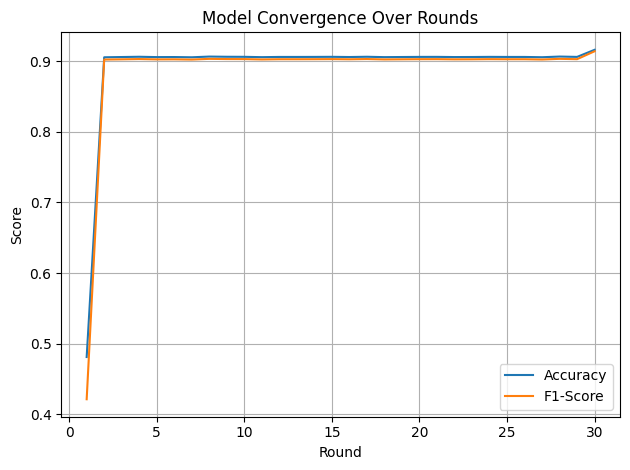

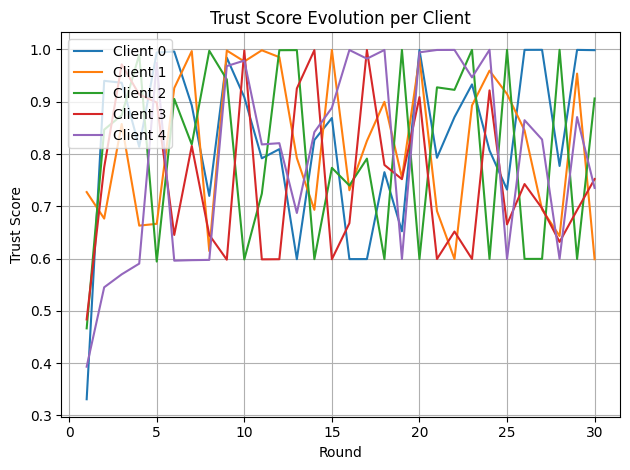

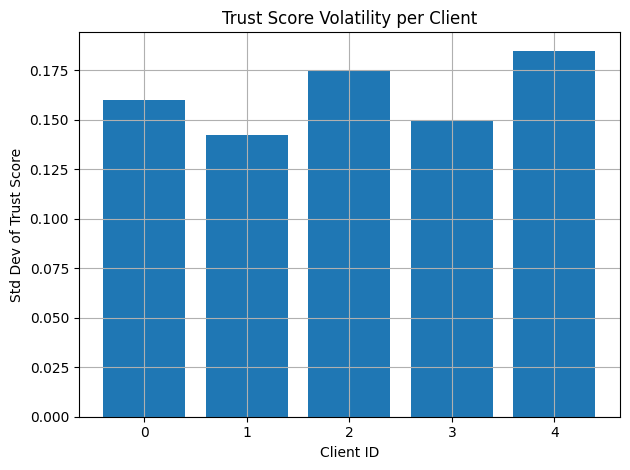

10628/10628 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step


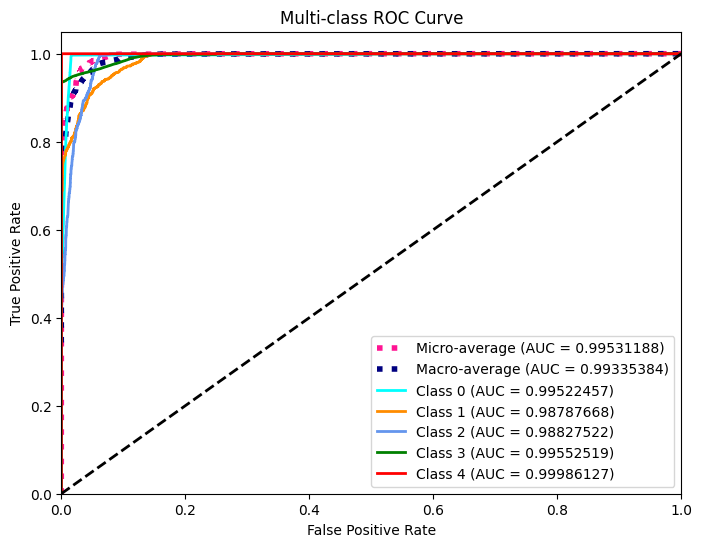


AUC Scores:
Class 0: 0.99522457
Class 1: 0.98787668
Class 2: 0.98827522
Class 3: 0.99552519
Class 4: 0.99986127
Micro-average: 0.99531188
Macro-average: 0.99335384


In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train_cat.shape[1]

def build_hybrid_model(input_shape, num_classes):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    model.add(LSTM(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def compute_cosine_similarity(update1, update2):
    flat1 = np.concatenate([w.flatten() for w in update1])
    flat2 = np.concatenate([w.flatten() for w in update2])
    return 1 - cosine(flat1, flat2)

def compute_stability(client_updates, history):
    if len(history) < 2:
        return 1.0
    sims = [compute_cosine_similarity(client_updates, past) for past in history[-3:]]
    return np.mean(sims)

def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val + 1e-8)

def compute_trust_scores(client_updates_dict, global_weights, val_losses_dict, update_history_dict, alpha=(0.4, 0.4, 0.2)):
    scores = {}
    all_val_losses = list(val_losses_dict.values())
    min_loss, max_loss = min(all_val_losses), max(all_val_losses)

    for client_id, local_update in client_updates_dict.items():
        sim = compute_cosine_similarity(local_update, global_weights)
        val_loss = val_losses_dict[client_id]
        stability = compute_stability(local_update, update_history_dict.get(client_id, []))
        norm_val_loss = normalize(val_loss, min_loss, max_loss)
        trust = (alpha[0] * sim) + (alpha[1] * (1 - norm_val_loss)) + (alpha[2] * stability)
        scores[client_id] = trust
    return scores

def trust_weighted_aggregation(client_weights, trust_scores):
    total_trust = sum(trust_scores.values())
    new_global = [
        sum(trust_scores[cid] * np.array(client_weights[cid][i]) for cid in client_weights) / total_trust
        for i in range(len(next(iter(client_weights.values()))))
    ]
    return new_global

def evaluate_global_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    return accuracy, precision, recall, f1, cm

# Trust and metric logs
trust_log = []
round_metrics = []
communication_cost_log = []

def federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat, num_clients=5, rounds=30):
    client_data = np.array_split(X_train, num_clients)
    client_labels = np.array_split(y_train_cat, num_clients)

    global_model = build_hybrid_model(input_shape, num_classes)
    global_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    global_weights = global_model.get_weights()

    update_history = {i: [] for i in range(num_clients)}

    for round in range(rounds):
        client_updates = {}
        val_losses = {}
        round_cost = 0

        for i in range(num_clients):
            local_model = build_hybrid_model(input_shape, num_classes)
            local_model.set_weights(global_weights)
            local_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            local_model.fit(client_data[i], client_labels[i], epochs=1, batch_size=32, verbose=0)

            local_weights = local_model.get_weights()
            loss, _ = local_model.evaluate(X_test, y_test_cat, verbose=0)

            client_updates[i] = local_weights
            val_losses[i] = loss
            update_history[i].append(local_weights)

            # Compute communication cost per client
            round_cost += sum(w.nbytes for w in local_weights)

        trust_scores = compute_trust_scores(client_updates, global_weights, val_losses, update_history)

        for client_id, score in trust_scores.items():
            trust_log.append({
                'round': round + 1,
                'client_id': client_id,
                'trust_score': score
            })

        global_weights = trust_weighted_aggregation(client_updates, trust_scores)
        global_model.set_weights(global_weights)

        accuracy, precision, recall, f1, cm = evaluate_global_model(global_model, X_test, y_test_cat)
        print(f"Round {round + 1}")
        #print(f"Accuracy: {accuracy:.8f}, F1-Score: {f1:.8f}")
        print(f"Accuracy: {accuracy:.8f}, Precision: {precision:.8f}, Recall: {recall:.8f}, F1-Score: {f1:.8f}")
        print(f"Confusion Matrix:\n{cm}\n")

        round_metrics.append({'round': round + 1, 'accuracy': accuracy, 'f1': f1})
        communication_cost_log.append({'round': round + 1, 'comm_cost_MB': round_cost / (1024**2)})

    # Save logs
    pd.DataFrame(trust_log).to_csv("trust_scores_log.csv", index=False)
    pd.DataFrame(round_metrics).to_csv("round_metrics_log.csv", index=False)
    pd.DataFrame(communication_cost_log).to_csv("communication_cost_log.csv", index=False)

    # Plot accuracy and F1-score
    metric_df = pd.DataFrame(round_metrics)
    plt.plot(metric_df['round'], metric_df['accuracy'], label='Accuracy')
    plt.plot(metric_df['round'], metric_df['f1'], label='F1-Score')
    plt.title("Model Convergence Over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score trends
    trust_df = pd.DataFrame(trust_log)
    for client_id in trust_df['client_id'].unique():
        client_data = trust_df[trust_df['client_id'] == client_id]
        plt.plot(client_data['round'], client_data['trust_score'], label=f'Client {client_id}')
    plt.xlabel("Round")
    plt.ylabel("Trust Score")
    plt.title("Trust Score Evolution per Client")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot trust score volatility (standard deviation over rounds)
    volatility = trust_df.groupby('client_id')['trust_score'].std().reset_index()
    plt.bar(volatility['client_id'], volatility['trust_score'])
    plt.title("Trust Score Volatility per Client")
    plt.xlabel("Client ID")
    plt.ylabel("Std Dev of Trust Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Add ROC/AUC calculation and plotting
    y_pred = global_model.predict(X_test)
    y_test_labels = np.argmax(y_test_cat, axis=1)
    n_classes = y_test_cat.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average (AUC = {roc_auc["micro"]:.8f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average (AUC = {roc_auc["macro"]:.8f})',
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.8f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC values
    print("\nAUC Scores:")
    for i in range(n_classes):
        print(f"Class {i}: {roc_auc[i]:.8f}")
    print(f"Micro-average: {roc_auc['micro']:.8f}")
    print(f"Macro-average: {roc_auc['macro']:.8f}")



# Execute
federated_learning_with_trust(X_train, y_train_cat, X_test, y_test_cat)